In [38]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [39]:
#stocks = ['MMM', 'AMZN', 'KO', 'CSCO', 'META'] #portfolio components
stocks = ['AMZN', 'GOOGL', 'INTC', 'META', 'AAPL']


weights = [0.25, 0.2, 0.25, 0.25, 0.05] #percentage of the components in portfolio
historical_data = yf.download(stocks, start='2018-01-01') #download data from date selected
historical_data.head() #print preview

[*********************100%***********************]  5 of 5 completed


Adj Close                                                   Close  \
                 AAPL       AMZN      GOOGL       INTC        META       AAPL   
Date                                                                            
2018-01-02  40.950497  59.450500  53.660500  40.787399  181.419998  43.064999   
2018-01-03  40.943363  60.209999  54.576000  39.403149  184.669998  43.057499   
2018-01-04  41.133545  60.479500  54.787998  38.680553  184.330002  43.257500   
2018-01-05  41.601864  61.457001  55.514500  38.950451  186.850006  43.750000   
2018-01-08  41.447346  62.343498  55.710499  38.950451  188.279999  43.587502   

                                                         ...       Open  \
                 AMZN      GOOGL       INTC        META  ...       AAPL   
Date                                                     ...              
2018-01-02  59.450500  53.660500  46.849998  181.419998  ...  42.540001   
2018-01-03  60.209999  54.576000  45.259998  184.669998  ...  43.132500   
2018-01-04  60.479500  54.787998  44.430000  184.330002  ...  43.134998   
2018-01-05  61.457001  55.514500  44.740002  186.850006  ...  43.360001   
2018-01-08  62.343498  55.710499  44.740002  188.279999  ...  43.587502   

                                                            Volume            \
                 AMZN      GOOGL       INTC        META       AAPL      AMZN   
Date                                                                           
2018-01-02  58.599998  52.651001  46.380001  177.679993  102223600  53890000   
2018-01-03  59.415001  53.696499  45.470001  181.880005  118071600  62176000   
2018-01-04  60.250000  54.854500  43.520000  184.899994   89738400  60442000   
2018-01-05  60.875500  55.172501  44.430000  185.589996   94640000  70894000   
2018-01-08  61.799999  55.549999  44.270000  187.199997   82271200  85590000   

                                           
               GOOGL       INTC      META  
Date                                       
2018-01-02  31766000   23370800  18151900  
2018-01-03  31318000  116479000  16886600  
2018-01-04  26052000   89209100  13880900  
2018-01-05  30250000   41824000  13574500  
2018-01-08  24644000   33733800  17994700  

[5 rows x 30 columns]

In [40]:
close_price = historical_data['Close'].pct_change() #percentage of return between open price and close price
portfolio_return = (close_price * weights).sum(axis=1)
cumulative_return = (portfolio_return + 1).cumprod()
cumulative_return.head()

Date
2018-01-02    1.000000
2018-01-03    0.999188
2018-01-04    0.997540
2018-01-05    1.009333
2018-01-08    1.012585
dtype: float64

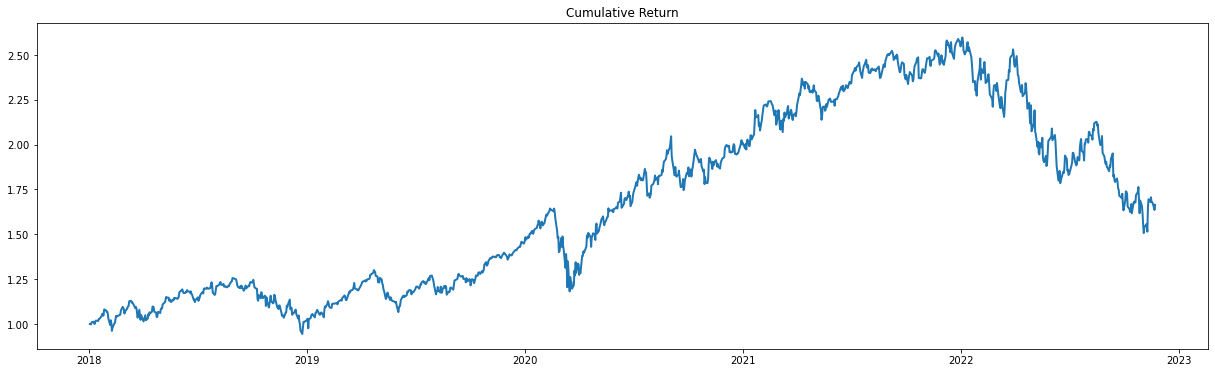

In [41]:
#data 
x = cumulative_return.keys()
y = cumulative_return

fig, ax = plt.subplots(figsize=(21,6))
ax.plot(x, y, linewidth=2.0)
ax.set_title('Cumulative Return')

plt.show()

In [42]:
portfolio_weights=[]
portfolio_returns=[]
portfolio_risk=[]
portfolio_sharpe=[]

def optimization(close):
    random_stocks = np.random.uniform(size=len(close.columns))
    random_stocks = random_stocks / np.sum(random_stocks)

    portfolio_weights.append(random_stocks) #portfolio percentage

    mean = (close.mean() * random_stocks).sum() * 252 #return
    portfolio_returns.append(mean)

    volatility = (close * random_stocks).sum(axis=1) #portfolio risk 
    annual_std = np.std(volatility) * np.sqrt(252)
    portfolio_risk.append(annual_std)

    sharpe_ratio = (np.mean(volatility) / np.std(volatility)) * np.sqrt(252)
    portfolio_sharpe.append(sharpe_ratio)


count = 10000
for k in range(0, count):
    optim = optimization(close_price)

In [43]:
# El Ratio de Sharpe es la rentabilidad que ofrece una inversión por cada unidad de riesgo que asume.
max_sharpe_ratio = np.argmax(portfolio_sharpe)
max_portfolio_weights = portfolio_weights[max_sharpe_ratio]
print(f"Max sharpe ratio: {portfolio_sharpe[max_sharpe_ratio]}")

print("portfolio")
for i in range(len(max_portfolio_weights)):
    print(close_price.columns[i], max_portfolio_weights[i])


Max sharpe ratio: 0.8342146343044298
portfolio
AAPL 0.5846635308974076
AMZN 0.01224065103921027
GOOGL 0.39421739760943636
INTC 0.0007906559132721762
META 0.008087764540673656


##### results with count: 1000
- Max sharpe ratio: 0.49808106941354274
- Portfolio with the higher Sharpe ratio: [0.61601211 0.01377951 0.35576994 0.01443845]

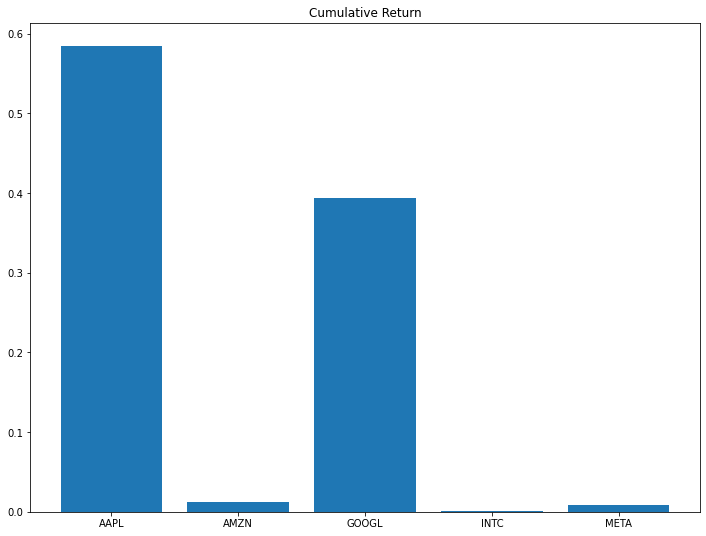

In [44]:
#Composition portfolio 
#data 
x = close_price.columns
y = max_portfolio_weights

fig, ax = plt.subplots(figsize=(12,9))
ax.bar(x, y)
ax.set_title('Cumulative Return')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

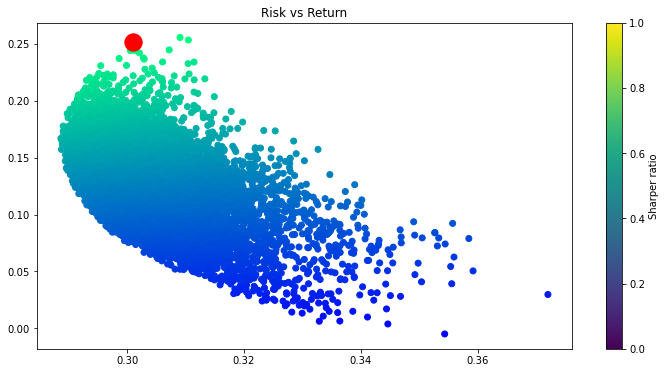

In [45]:
# Efficient Frontier
max_ratio = max_sharpe_ratio

x = portfolio_risk
y = portfolio_returns


fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(x, y, c=portfolio_sharpe, cmap='winter') #Efficient Frontier between risk and return
ax.set_title('Risk vs Return')


plt.scatter(x[max_ratio], y[max_ratio], color='r', marker='o', s=300) #sharpe ratio
plt.colorbar(label='Sharper ratio')

plt.show

In [46]:
# save files
import csv

def savecsv(filename, header, rows):
    with open (filename, "w", newline='' ,encoding='utf-8') as file:

        write = csv.writer(file)
        write.writerow(header)
        write.writerows(rows)


# portfolio weights
column_name = close_price.columns.to_list()
for i in ['Sharpe', 'returns', 'risk']:
    column_name.append(i)

datacsv1 = []

for i in range(len(portfolio_weights)):
    data = np.append(portfolio_weights[i], [portfolio_sharpe[i], portfolio_returns[i],portfolio_risk[i]])
    datacsv1.append(data)

savecsv("p_weights.csv", column_name, datacsv1)


